<a href="https://colab.research.google.com/github/iProlly/Machine-Learning-PBL/blob/main/Modification_Command.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This file is only for .csv modification
---
\
There is **no machine learning** components in this file. This is only for .csv modification.

Currently, we only accept 8 types of input. Different input require different section of coding cell, so choose the section suitable to your need.

1. Normalization (1 file): If you want to just normalize those data, do it here. This is not actually augmentation, but it is useful anyway.
2. Normalized concatenation (many files): Suppose you have many files. Each files are corresponding to different compounds, and you want to connect them (with embedded normalization) together so you can use in ML. This is your section
3. Normal augmentation (1 file): Suppose you have 1 file, containing labels and data of all samples, and you want to add new datapoint based on labels you have. This is your section.
4. Augmentation with mixture creation (1 file): Suppose you have 1 file, containing labels and data of all samples, and you want to mix them together to form mixture. This is your section.
5. Augmentation with mixture creation (1 file, compulsary): Suppose you have 1 file, containing labels and data of all samples, and you want to mix them together to form mixture. You also need one compulsary in the mixture. This is your section.
6. Augmentation with mixture creation and ratio (1 file): This is very similar to 2nd section. What's more is that you also need the ratio of each compound in the mixture. If you need it, this is your section.
7. Augmentation with mixture creation and ratio (1 file, compulsary): This is very similar to 2nd section. You also need one compulsary in the mixture. What's more is that you also need the ratio of each compound in the mixture. If you need it, this is your section.
8. Changing to MATLAB Format (1 file): File from 4, 5 can be converted to MATLAB usable format here.

There will be more explanation at each section, about what kind of input we need, and what parameters we can adjust.
Before you begin to run at any section. Make sure to run these 2 cells below first. These are module import and defined function. After you finished, you may begin start at your section.

In [ ]:
# Module Import
import pandas as pd
import numpy as np
import os
from google.colab import drive
import random
import io

In [ ]:
# Defined function

# This function is to augment data without creating mixture. (one compound)
def augment_data_one(X, num_new_samples, noise_std=0.05):
    n_samples = len(X)
    X_augmented = []

    for _ in range(num_new_samples):
        # Generate random coefficients for all samples & normalize it
        coefficients = np.random.rand(n_samples)
        coefficients /= np.sum(coefficients)

        # Create the new sample as a weighted sum of all samples
        new_sample = np.sum(coefficients[:, np.newaxis] * X, axis=0)

        # Add Gaussian Noise
        noise = np.random.normal(0, noise_std * (new_sample.max() - new_sample.min()), new_sample.shape)
        new_sample += noise

        # Renormalize to range [0, 10000]
        new_sample = 10000 * (new_sample - new_sample.min()) / (new_sample.max() - new_sample.min())

        X_augmented.append(new_sample)

    return X_augmented

# This function is to augment data with creating mixture. (many compounds)
def augment_data_many(X, index, noise_std=0.05):
    temp_list = []
    # Generate random coefficients for all samples & normalize it
    coefficients = np.random.rand(len(index))
    coefficients /= np.sum(coefficients)
    while (coefficients[0]<=0.25 or coefficients[0]>= 0.75):
      coefficients = np.random.rand(len(index))
      coefficients /= np.sum(coefficients)

    # Extract data of compound according to index
    for j in index:
      k = random.randint(0,len(X[j])-1)
      temp_list.append(X[j][k])

    temp_list = np.array(temp_list)
    # Create the new sample as a weighted sum of all samples
    new_sample = np.sum(coefficients[:, np.newaxis] * temp_list, axis=0)

    # Add Gaussian Noise
    noise = np.random.normal(0, noise_std * (new_sample.max() - new_sample.min()), new_sample.shape)
    new_sample += noise

    # Renormalize to range [0, 10000]
    new_sample = 10000 * (new_sample - new_sample.min()) / (new_sample.max() - new_sample.min())

    return new_sample, coefficients

# This is normalization to range [0, 10000]
def normalize(X):
  new_sample = 10000 * (X - X.min()) / (X.max() - X.min())

  return new_sample

# First Section: Normalization (1 file)

Suppose you have these non-normalizded data. If you want to normalize it without any other augmentation. do it here!

---

Input we need: We need only 1 .csv file, containing every datapoint you have.You must have header, namely label and feature.  See **good** example below.

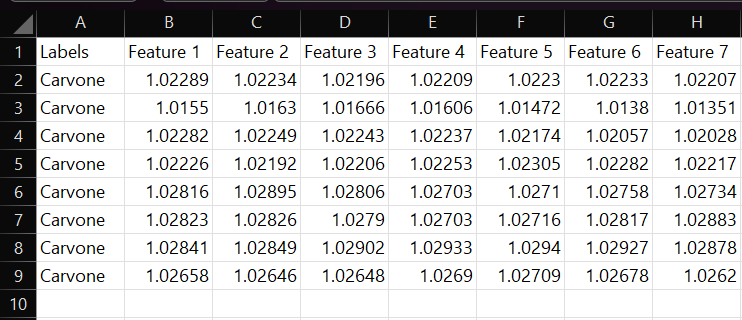

If you want to do this part, you can just upload the .csv file onto the session on the left.

After you finished the run, there will be one output file with all augmented data, labels, and header. (See example below)

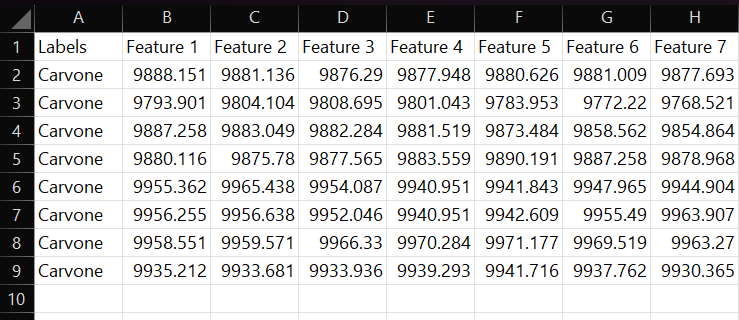



In [ ]:
# IF WE HAVE ONE FILE, AND YOU WANT TO MORMALIZE 1

# Parameters
# give out the .csv input file you just upload, you must include .csv
file_name = 'mix.csv'

In [ ]:
# IF WE HAVE ONE FILE, AND YOU WANT TO NORMALIZE 2

# Extract Data, Normalize it
raw = pd.read_csv('/content/' + file_name)
labels = raw.iloc[:, 0].values
data_raw = raw.iloc[:, 1:].values
data = normalize(data_raw)

# Setup output header
head = ["Labels"]
for i in range(data.shape[1]):
  head.append("Feature "+ str(i+1))
head = np.array(head)

# Output
df = pd.DataFrame(np.column_stack((labels, data)), columns = head)
df.to_csv('output.csv', index=False, header=True)

# Second section: Normalized concatenation (many files)
Suppose you have many .csv files. Each files are corresponding to different compounds, and you want to concatenate them together to form one new .csv. This is your section.

---
Input we need: We need **many** (more than 1) .csv file. Each files are corresponding to one labels. You **must not** have header. (no labels, no feature, this is different from above) There is no need to normalize beforehand because we will do it for you. Here below is a **good** example.

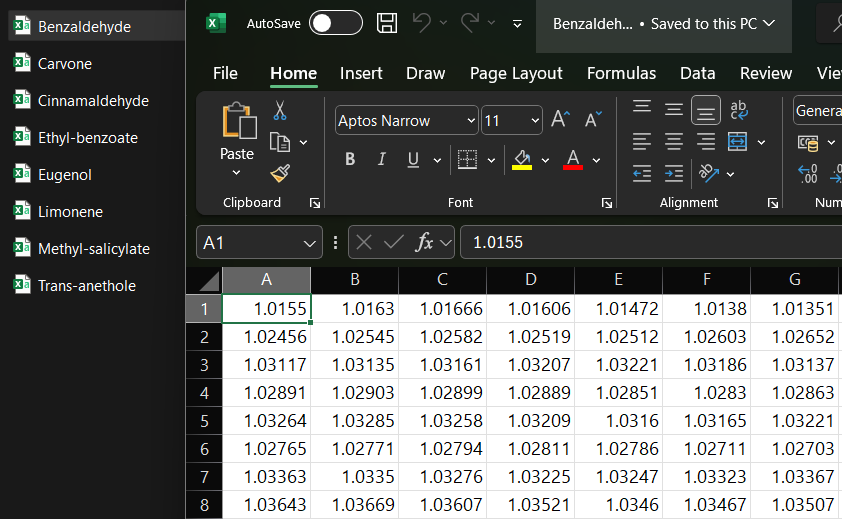

For this section, there are several things required to do.
1. Need to name the file as compound name, or the label you want it to be.
2. When you upload the file onto the session, you **must** upload and put in the folder **data** (create one).

After you finished the run, there will be one output file with all data, labels, and header. (See example below)

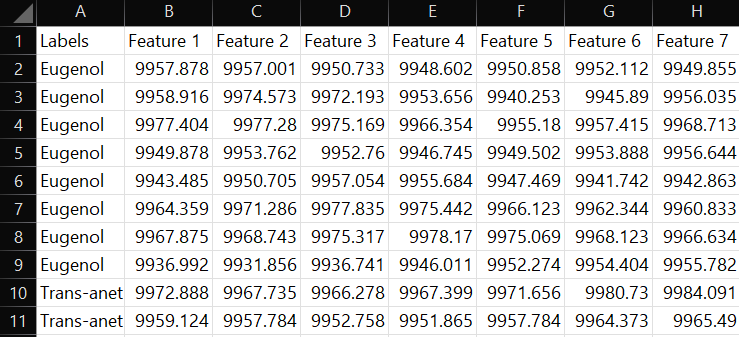

In [ ]:
# IF WE HAVE MANY FILES, AND YOU WANT TO AUGMENT 1
data_dir = '/content/Data'

compound_list = []
Rawdata = []

# Extract Data, Normalize it, Put it together
for filename in os.listdir(data_dir):
  if filename.endswith('.csv'):
    compound_list.append(filename[:-4])
    file_path = os.path.join(data_dir, filename)
    df = pd.read_csv(file_path, header = None)
    intensity = df.to_numpy()
    for i in range(len(intensity)):
      intensity[i] = normalize(intensity[i])
    Rawdata.append(intensity)
Rawdata = np.array(Rawdata)

In [ ]:
# IF WE HAVE MANY FILES, AND YOU WANT TO AUGMENT 2

data = []
labels = []

# Rearrange Data
for i in range(Rawdata.shape[0]):
  data.extend(Rawdata[i])
  labels.extend([compound_list[i]]*Rawdata.shape[1])

data = np.array(data)
labels = np.array(labels)

# Setup output header
head = ["Labels"]
for i in range(data.shape[1]):
  head.append("Feature "+ str(i+1))
head = np.array(head)

# Output
df = pd.DataFrame(np.column_stack((labels, data)), columns = head)
df.to_csv('output.csv', index=False, header=True)

# Third section: Normal augmentation (1 file)
Suppose you have one file, containing labels and data of all samples, and you want to add new datapoint based on labels you have. This is your section.

---
Input we need: We need only 1 .csv file, containing every datapoint you have.You **must** have header, namely label and feature. There is no need to normalize beforehand because we will do it for you. Here below is a **good** example.

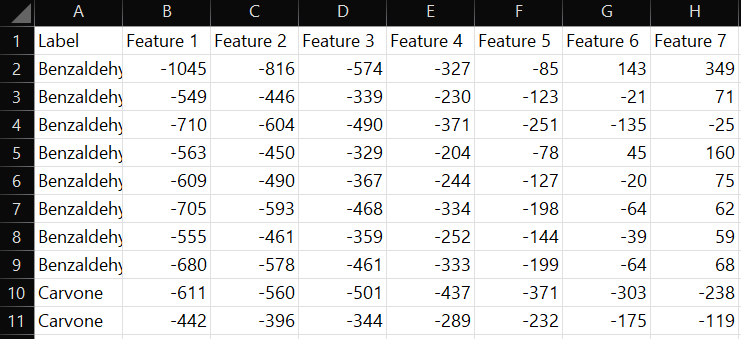

If you want to do this part, you can just upload the .csv file onto the session on the left.\
After you finished the run, there will be one output file with all augmented data, labels, and header. (See example below)

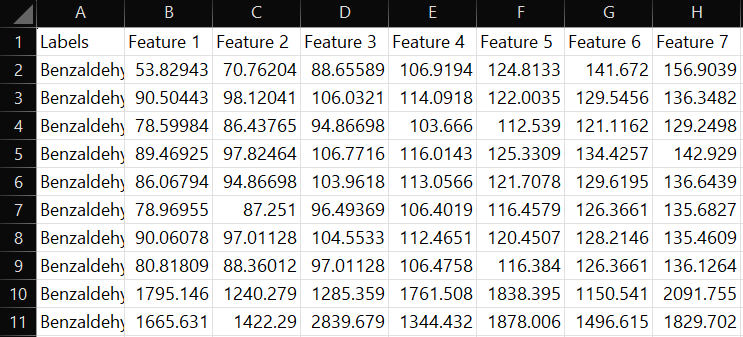

You can adjust parameters in the first cell.

In [ ]:
# IF WE HAVE ONE FILE, AND YOU WANT TO AUGMENT 1

# Parameters

# num_per_sample is the number of samples per labels you want it to have.
# For example, if you have 4 labels and num_per_sample = 500, in the end you will have 2000 datapoint, 500 datapoint each labels.
num_per_sample = 500

# give out the .csv input file you just upload, you must include .csv
file_name = 'origin.csv'

In [ ]:
# IF WE HAVE ONE FILE, AND YOU WANT TO AUGMENT 2

data = []
labels = []

# Extract Data, Normalize it
raw = pd.read_csv('/content/' + file_name)
labels_raw = raw.iloc[:, 0].values
data_raw = raw.iloc[:, 1:].values
data_raw = normalize(data_raw)

# Augment Data, Loop for every labels
for i in range(np.unique(labels_raw).shape[0]):
  data_temp = []
  labels_temp = []

  # Extract only one kind label to augment
  for j in range(labels_raw.shape[0]):
    if np.unique(labels_raw)[i] == labels_raw[j]:
      data_temp.append(data_raw[j])
      labels_temp.append(labels_raw[j])

  # Augment on that one label
  data_augmented = augment_data_one(data_temp, num_per_sample - len(labels_temp))
  data_temp.extend(data_augmented)
  labels_temp.extend(labels_temp[:1]*len(data_augmented))
  data.extend(data_temp)
  labels.extend(labels_temp)

data = np.array(data)
labels = np.array(labels)

In [ ]:
# IF WE HAVE ONE FILE, AND YOU WANT TO AUGMENT 3

# Setup output header
head = ["Labels"]
for i in range(data.shape[1]):
  head.append("Feature "+ str(i+1))
head = np.array(head)

# Output
df = pd.DataFrame(np.column_stack((labels, data)), columns = head)
df.to_csv('output.csv', index=False, header=True)

# Fourth section: Augmentation with mixture creation (1 file)
Suppose you have one file, containing labels and data of all samples, and you want to mix them together to form mixture. This is your section.

---
Input we need: We need only 1 .csv file, containing every datapoint you have.You **must** have header, namely label and feature. There is no need to normalize beforehand because we will do it for you. Here below is a **good** example.


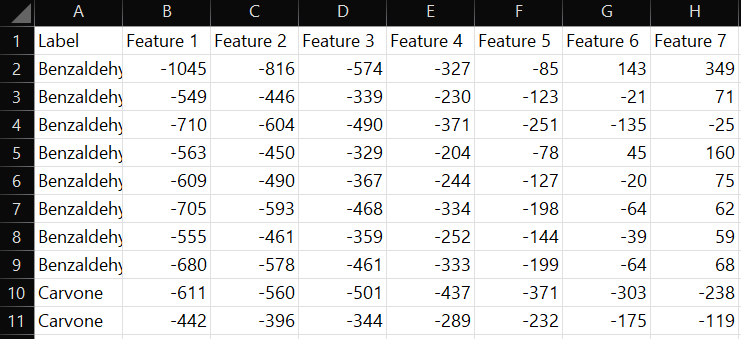

If you want to do this part, you can just upload the .csv file onto the session on the left.

After you finished the run, there will be one output file with all augmented data, labels, and header. (See example below)

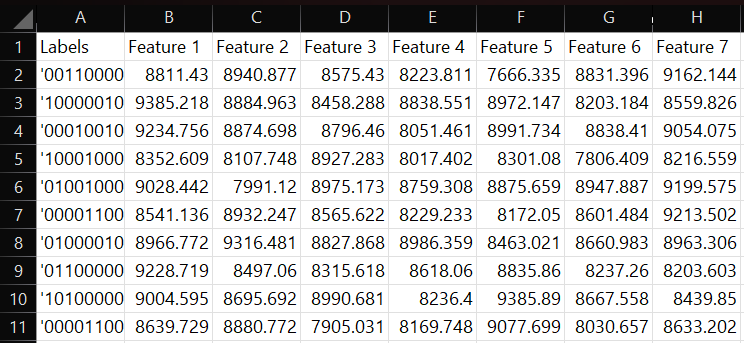

The labels represent the existence of compound in mixture in binary format. "0" = not exist, and "1" = exist. Here is example of how to read it.
- In the first sample (in the picture above): the label is "00110000"
- There is "1" in the 3rd and the 4th position, it means that the 3rd and the 4th compounds exist, others do not.
- What is the 3rd and the 4th compounds? look at variable compound_list. (This is **extremely important**, you **must** note compound_list) It is Cinnamaldehyde and Ethyl-benzoate!
- Thus this samples contain Cinnamaldehyde and Ethyl-benzoate!

You can adjust parameters in the first cell.

In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE 1

# Parameters

# num_compound is the number of compound in the mixture you want it to have.
# For example, if you want your mixture to have 2 compounds, put 2.
num_compound = 2

# mixed_data is the total number of augmented data you want to have.
mixed_data = 4000

# give out the .csv input file you just upload, you must include .csv
file_name = 'Hello.csv'

In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE 2
Rawdata = []


# Extract Data, Normalize it
raw = pd.read_csv('/content/' + file_name)
labels_raw = raw.iloc[:, 0].values
data_raw = raw.iloc[:, 1:].values
data_raw = normalize(data_raw)

compound_list = list(np.unique(labels_raw))

# Augment Data, Loop for every labels
for i in range(np.unique(labels_raw).shape[0]):
  data_temp = []

  # Extract only one kind label to augment
  for j in range(labels_raw.shape[0]):
    if np.unique(labels_raw)[i] == labels_raw[j]:
      data_temp.append(data_raw[j])
  Rawdata.append(data_temp)

Rawdata = np.array(Rawdata)
print(compound_list)

['Benzaldehyde', 'Carvone', 'Cinnamaldehyde', 'Ethyl Benzoate', 'Eugenol', 'Limonene', 'Methyl Salicylate', 'Trans-anethole']


In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE 3

augmented_data = []
binary_labels = []

# Augmentation (By combination), loop for new data point
for i in range(mixed_data):
  # rand = compound number in mixture
  rand = random.sample(range(len(compound_list)),num_compound)

  # Augment Data
  newpoint, coeff = augment_data_many(Rawdata, rand)
  augmented_data.append(newpoint)

  # Add binary labels
  label = "'"
  for k in range(len(compound_list)):
    if k in rand:
      label += '1'
    else:
      label += '0'
  binary_labels.append(label)
augmented_data = np.array(augmented_data)

In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE 4

# Setup output header
head = ["Labels"]
for i in range(augmented_data.shape[1]):
  head.append("Feature "+ str(i+1))
head = np.array(head)

# Output
df = pd.DataFrame(np.column_stack((np.array(binary_labels), augmented_data)), columns=head)
df.to_csv('output.csv', index=False, header=True)

# Fifth section: Augmentation with mixture creation (1 file, compulsary compound)
Suppose you have one file, containing labels and data of all samples, and you want to mix them together to form mixture, **and** you want to have compulsary compound. This is your section.

---
Input we need: We need only 1 .csv file, containing every datapoint you have.You **must** have header, namely label and feature. There is no need to normalize beforehand because we will do it for you. Here below is a **good** example.


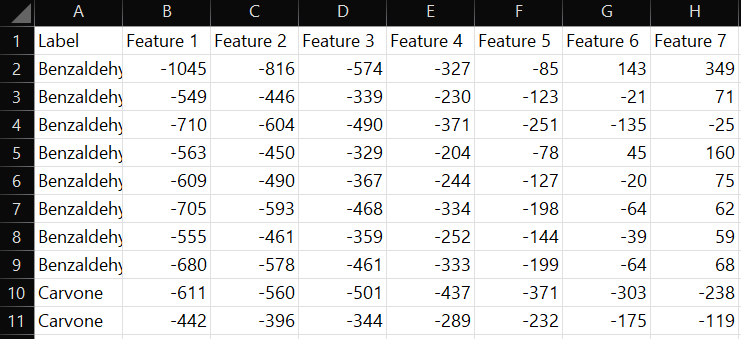

If you want to do this part, you can just upload the .csv file onto the session on the left.

After you finished the run, there will be one output file with all augmented data, labels, and header. (See example below)

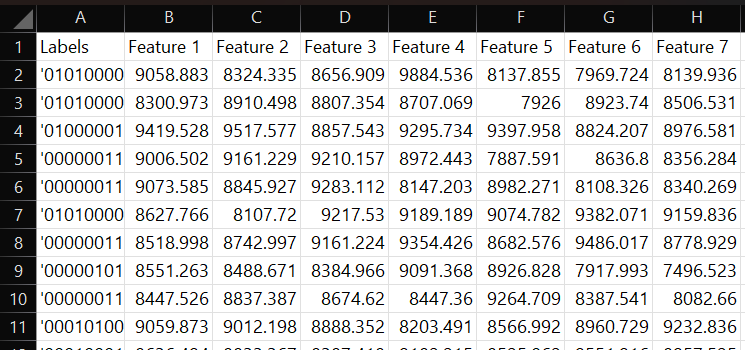

The labels represent the existence of compound in mixture in binary format. "0" = not exist, and "1" = exist. Here is example of how to read it.
- In the first sample (in the picture above): the label is "00110000"
- There is "1" in the 3rd and the 4th position, it means that the 3rd and the 4th compounds exist, others do not.
- What is the 3rd and the 4th compounds? look at variable compound_list. (This is **extremely important**, you **must** note compound_list) It is Cinnamaldehyde and Ethyl-benzoate!
- Thus this samples contain Cinnamaldehyde and Ethyl-benzoate!

You can adjust parameters in the first cell.

In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE WITH COMPULSARY COMPOUND 1

# Parameters

# num_compound is the number of compound in the mixture you want it to have.
# For example, if you want your mixture to have 2 compounds, put 2.
num_compound = 2

# mixed_data is the total number of augmented data you want to have.
mixed_data = 4000

# give out the .csv input file you just upload, you must include .csv
file_name = 'IR.csv'

In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE WITH COMPULSARY COMPOUND 2
Rawdata = []


# Extract Data, Normalize it
raw = pd.read_csv('/content/' + file_name)
labels_raw = raw.iloc[:, 0].values
data_raw = raw.iloc[:, 1:].values
data_raw = normalize(data_raw)

compound_list = list(np.unique(labels_raw))

# Augment Data, Loop for every labels
for i in range(np.unique(labels_raw).shape[0]):
  data_temp = []

  # Extract only one kind label to augment
  for j in range(labels_raw.shape[0]):
    if np.unique(labels_raw)[i] == labels_raw[j]:
      data_temp.append(data_raw[j])
  Rawdata.append(data_temp)


Rawdata = np.array(Rawdata)
print(compound_list)

['Benzaldehyde', 'Carvone', 'Cinnamaldehyde', 'Ethyl-benzoate', 'Eugenol', 'Limonene', 'Methyl-salicylate', 'Trans-anethole']


In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE WITH COMPULSARY COMPOUND 3

# Specify the compulsary compound
compul = 1
print(compound_list[compul-1])

<generator object <genexpr> at 0x7c7c1093ab20>


In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE WITH COMPULSARY COMPOUND 4

augmented_data = []
binary_labels = []

# Augmentation (By combination), loop for new data point
for i in range(mixed_data):
  # rand = compound number in mixture
  if i >= mixed_data/2:
    rand = random.sample(range(len(compound_list)),num_compound - 1)
    while (compul-1 in rand):
      rand = random.sample(range(len(compound_list)),num_compound - 1)
    rand = [compul-1] + rand
  else:
    rand = random.sample(range(len(compound_list)),num_compound)
    while (compul-1 in rand):
      rand = random.sample(range(len(compound_list)),num_compound)

  # Augment Data
  newpoint, coeff = augment_data_many(Rawdata, rand)
  augmented_data.append(newpoint)

  # Add binary labels
  label = "'"
  for k in range(len(compound_list)):
    if k in rand:
      label += '1'
    else:
      label += '0'
  binary_labels.append(label)
augmented_data = np.array(augmented_data)

In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE WITH COMPULSARY COMPOUND 5

# Setup output header
head = ["Labels"]
for i in range(augmented_data.shape[1]):
  head.append("Feature "+ str(i+1))
head = np.array(head)

# Output
df = pd.DataFrame(np.column_stack((np.array(binary_labels), augmented_data)), columns=head)
df.to_csv('output.csv', index=False, header=True)

# Sixth section: Augmentation with mixture creation and ratio (1 file)
Suppose you have one file. containing labels and data of all samples,, and you want to mix them together to form mixture and you also need the ratio of each compound in the mixture. This is your section.

---
Input we need: We need only 1 .csv file, containing every datapoint you have.You **must** have header, namely label and feature. There is no need to normalize beforehand because we will do it for you. Here below is a **good** example.


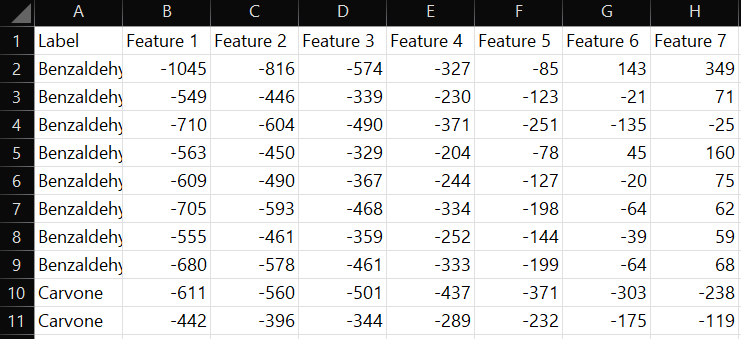

If you want to do this part, you can just upload the .csv file onto the session on the left.

After you finished the run, there will be one output file with all augmented data, labels, and header. (See example below)

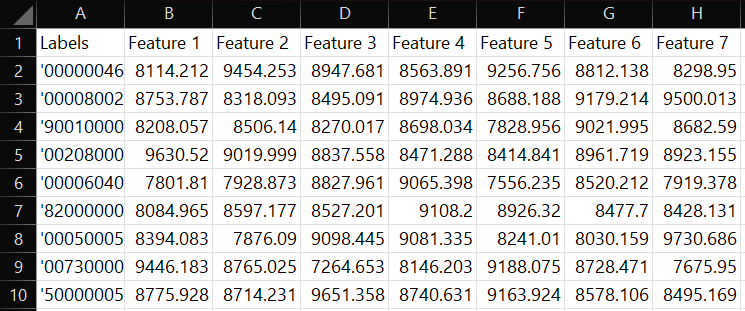

The labels represent the ratio of compound in mixture in decimal format. "0" = not exist, "1" = 10%, "2" = 20% and so on. Here is example of how to read it.
- In the first sample (in the picture above): the label is "00000046"
- There is "4" in the 7th position and 6 in the 8th position, it means that the mixture composed of 40% of 7th compound and 60% of 8th compound.
- What is the 7th and the 8th compounds? look at variable compound_list. (This is **extremely important**, you **must** note compound_list) It is Carvone and Limonene!
- Thus this samples contain 40% Carvone and 60% Limonene.

You can adjust parameters in the first cell.

In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE WITH RATIO 1

# num_compound is the number of compound in the mixture you want it to have.
# For example, if you want your mixture to have 2 compounds, put 2.
num_compound = 2

# mixed_data is the total number of augmented data you want to have.
mixed_data = 4000

# give out the .csv input file you just upload, you must include .csv
file_name = 'TEST.csv'

In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE WITH RATIO 2
Rawdata = []


# Extract Data, Normalize it
raw = pd.read_csv('/content/' + file_name)
labels_raw = raw.iloc[:, 0].values
data_raw = raw.iloc[:, 1:].values
data_raw = normalize(data_raw)

compound_list = list(np.unique(labels_raw))

# Separate data according to labels
for i in range(np.unique(labels_raw).shape[0]):
  data_temp = []

  # Extract only one kind label to augment
  for j in range(labels_raw.shape[0]):
    if np.unique(labels_raw)[i] == labels_raw[j]:
      data_temp.append(data_raw[j])
  Rawdata.append(data_temp)

Rawdata = np.array(Rawdata)
print(compound_list)

In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE WITH RATIO 3

augmented_data = []
ratio_labels = []

# Augmentation (By combination), loop for new data point
for i in range(mixed_data):
  # rand = compound number in mixture
  rand = random.sample(range(len(compound_list)),num_compound)

  # Augment Data
  newpoint, coeff = augment_data_many(Rawdata, rand)
  augmented_data.append(newpoint)

  # Add labels
  label = "'"
  counter = 0
  for k in range(len(compound_list)):
    if k in rand:
      label += str(round(coeff[counter],1))[2]
      counter += 1
    else:
      label += '0'
  ratio_labels.append(label)
augmented_data = np.array(augmented_data)

In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE WITH RATIO 4

# Setup output header
head = ["Labels"]
for i in range(augmented_data.shape[1]):
  head.append("Feature "+ str(i+1))
head = np.array(head)

# Output
df = pd.DataFrame(np.column_stack((np.array(ratio_labels), augmented_data)), columns=head)
df.to_csv('output.csv', index=False, header=True)

# Seventh section: Augmentation with mixture creation and ratio (1 file)
Suppose you have one file. containing labels and data of all samples,, and you want to mix them together to form mixture and you also need the ratio of each compound in the mixture. This is your section.

---
Input we need: We need only 1 .csv file, containing every datapoint you have.You **must** have header, namely label and feature. There is no need to normalize beforehand because we will do it for you. Here below is a **good** example.


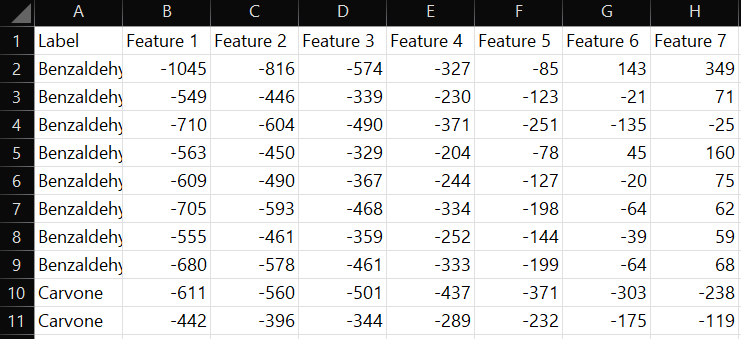

If you want to do this part, you can just upload the .csv file onto the session on the left.

After you finished the run, there will be one output file with all augmented data, labels, and header. (See example below)

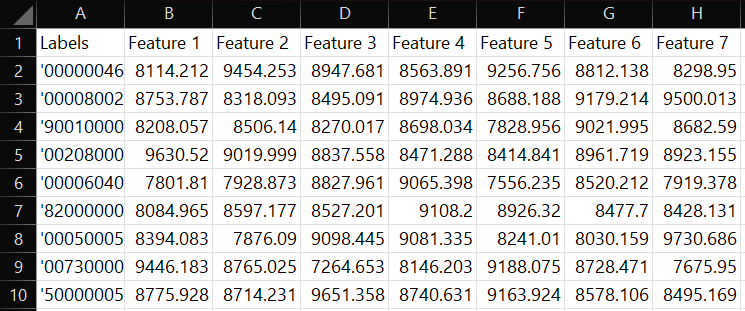

The labels represent the ratio of compound in mixture in decimal format. "0" = not exist, "1" = 10%, "2" = 20% and so on. Here is example of how to read it.
- In the first sample (in the picture above): the label is "00000046"
- There is "4" in the 7th position and 6 in the 8th position, it means that the mixture composed of 40% of 7th compound and 60% of 8th compound.
- What is the 7th and the 8th compounds? look at variable compound_list. (This is **extremely important**, you **must** note compound_list) It is Carvone and Limonene!
- Thus this samples contain 40% Carvone and 60% Limonene.

You can adjust parameters in the first cell.

In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE WITH RATIO AND COMPULSARY COMPOUND 1

# Parameters

# num_compound is the number of compound in the mixture you want it to have.
# For example, if you want your mixture to have 2 compounds, put 2.
num_compound = 2

# mixed_data is the total number of augmented data you want to have.
mixed_data = 4000

# give out the .csv input file you just upload, you must include .csv
file_name = 'IR.csv'

In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE WITH RATIO AND COMPULSARY COMPOUND 2
Rawdata = []


# Extract Data, Normalize it
raw = pd.read_csv('/content/' + file_name)
labels_raw = raw.iloc[:, 0].values
data_raw = raw.iloc[:, 1:].values
data_raw = normalize(data_raw)

compound_list = list(np.unique(labels_raw))

# Augment Data, Loop for every labels
for i in range(np.unique(labels_raw).shape[0]):
  data_temp = []

  # Extract only one kind label to augment
  for j in range(labels_raw.shape[0]):
    if np.unique(labels_raw)[i] == labels_raw[j]:
      data_temp.append(data_raw[j])
  Rawdata.append(data_temp)


Rawdata = np.array(Rawdata)
print(compound_list)

['Benzaldehyde', 'Carvone', 'Cinnamaldehyde', 'Ethyl-benzoate', 'Eugenol', 'Limonene', 'Methyl-salicylate', 'Trans-anethole']


In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE WITH RATIO AND COMPULSARY COMPOUND 3

# Specify the compulsary compound
compul = 1
print(compound_list[compul-1])

Benzaldehyde


In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE WITH RATIO AND COMPULSARY COMPOUND 4

augmented_data = []
ratio_labels = []

# Augmentation (By combination), loop for new data point
for i in range(mixed_data):
  # rand = compound number in mixture
  if i >= mixed_data/2:
    rand = random.sample(range(len(compound_list)),num_compound - 1)
    while (compul-1 in rand):
      rand = random.sample(range(len(compound_list)),num_compound - 1)
    rand = [compul-1] + rand
  else:
    rand = random.sample(range(len(compound_list)),num_compound)
    while (compul-1 in rand):
      rand = random.sample(range(len(compound_list)),num_compound)

  # Augment Data
  newpoint, coeff = augment_data_many(Rawdata, rand)
  augmented_data.append(newpoint)

  # Add labels
  label = "'"
  counter = 0
  for k in range(len(compound_list)):
    if k in rand:
      label += str(round(coeff[counter],1))[2]
      counter += 1
    else:
      label += '0'
  ratio_labels.append(label)
augmented_data = np.array(augmented_data)

In [ ]:
# IF WE HAVE 1 FILE, AND WE NEED TO MAKE MIXTURE WITH RATIO AND COMPULSARY COMPOUND 5

# Setup output header
head = ["Labels"]
for i in range(augmented_data.shape[1]):
  head.append("Feature "+ str(i+1))
head = np.array(head)

# Output
df = pd.DataFrame(np.column_stack((np.array(ratio_labels), augmented_data)), columns=head)
df.to_csv('output.csv', index=False, header=True)

# Eighth Section: Changing to MATLAB Format (1 file)

Suppose you have data of mixture with binary string labels (see pic below). This is not practically usable for MATLAB because you basically have 2^(number of compound) = 256 labels. It is better for you to split every digits of labels, so that you can use it in MATLAB.

---

Input we need: we need only 1 file. You **must** have header including labels and feature. See **good** example below.

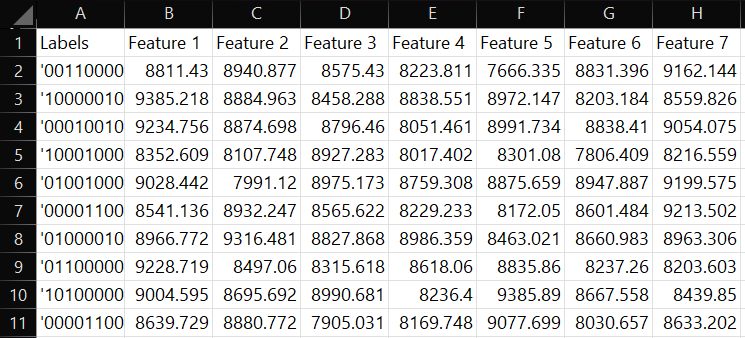

If you want to do this part, you can just upload the .csv file onto the session on the left.

After you finished the run, there will be one output file with all augmented data, labels, and header. (See example below)

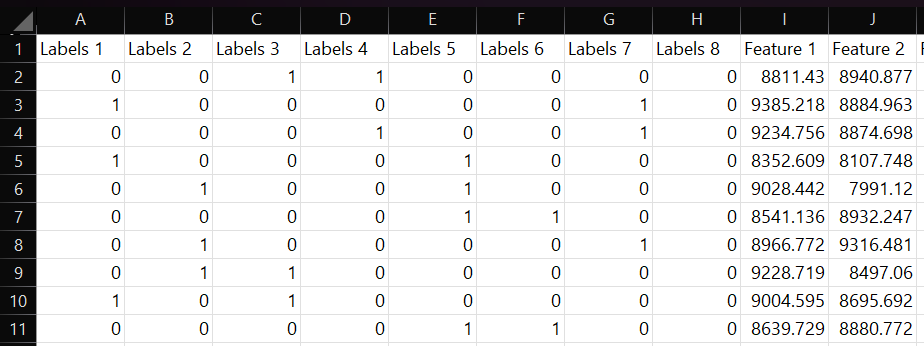

This is continuous part from mixture creation. So, consider using these below!

In [ ]:
# CONVERSION TO MATLAB 1

# give out the .csv input file you just upload, you must include .csv
file_name = 'TEST.csv'

In [ ]:
# CONVERSION TO MATLAB 2

# Extract Data, Normalize it
raw = pd.read_csv('/content/' + file_name)
labels_raw = raw.iloc[:, 0].values
data_raw = raw.iloc[:, 1:].values

# Add new labels (splitted one)
new_labels = []
for i in range(len(labels_raw)):
  new_labels.append(list(labels_raw[i][1:]))

# Setup output header
head = []
for j in range(len(new_labels[0])):
  text = "Labels " + str(j+1)
  head.append(text)

for i in range(data_raw.shape[1]):
  head.append("Feature "+ str(i+1))
head = np.array(head)

# Output
df = pd.DataFrame(np.column_stack((np.array(new_labels), data_raw)), columns=head)
df.to_csv('output.csv', index=False, header=True)